In [1]:
import torch
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import PIL

%matplotlib inline

In [2]:
def preprocess_img(img, ratio):
    sc_img = img.astype(np.float32) / 255.
    pil_img = PIL.Image.fromarray(sc_img)
    w = pil_img.width
    h = pil_img.height
    new_w = round(w * ratio)
    new_h = round(h * ratio)
    new_pil_img = pil_img.resize((new_w, new_h), PIL.Image.ANTIALIAS)
    return np.array(new_pil_img)

def preprocess_imgs(imgs, ratio):
    return np.array([ preprocess_img(img, ratio) for img in imgs ])

In [3]:
device = torch.device("cuda:0")

In [4]:
# pick up some mini-batch for autoencoder:
batch = pickle.load(open("./bengaliai-cv19/train_batch_001.pickle", "rb"))
X_batch = preprocess_imgs(batch['X'][0:64, :, :], 0.33)

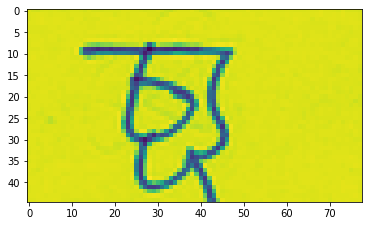

In [5]:
plt.imshow(X_batch[4])

In [6]:
height = X_batch.shape[1]
width = X_batch.shape[2]

X = torch.from_numpy(X_batch.reshape((X_batch.shape[0], height * width))).cuda()
Y = X

In [7]:
class ConvDenseNNModel(torch.nn.Module):
    
    def __init__(self):
        super(ConvDenseNNModel, self).__init__()
        self.layers = []
        self.layers.append([
            torch.nn.Linear(height * width, height * width // 4).cuda(),
            torch.nn.Sigmoid().cuda()
        ])
        self.layers.append([
            torch.nn.Linear(height * width // 4, height * width).cuda(),
            torch.nn.Sigmoid().cuda()
        ])
        self.model_modules = torch.nn.ModuleList()
        for layer in self.layers:
            for sublayer in layer:
                if isinstance(sublayer, torch.nn.Module):
                    self.model_modules.append(sublayer)
        
    def forward(self, x):
        for layer in self.layers:
            for sublayer in layer:
                x = sublayer(x)
        return x
    
    def parameters(self):
        return self.model_modules.parameters()


In [8]:
learning_rate = 0.01
iterations = 1000000

In [9]:
model = ConvDenseNNModel()
cost_fn = torch.nn.MSELoss().cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_stats = []

for i in range(iterations):
    Y_pred = model(X).cuda()
    loss = cost_fn(Y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i + 1) % 1000 == 0:
        print("Iteration #{}: loss={}".format(i + 1, loss.item()))
        loss_stats.append(loss.item())


Iteration #1000: loss=0.19238586723804474
Iteration #2000: loss=0.15295089781284332
Iteration #3000: loss=0.11639764904975891
Iteration #4000: loss=0.08860469609498978
Iteration #5000: loss=0.06974484771490097
Iteration #6000: loss=0.057327065616846085
Iteration #7000: loss=0.049024052917957306
Iteration #8000: loss=0.04329027980566025
Iteration #9000: loss=0.03918953984975815
Iteration #10000: loss=0.03615977615118027
Iteration #11000: loss=0.03385636582970619
Iteration #12000: loss=0.03206142783164978
Iteration #13000: loss=0.030632715672254562
Iteration #14000: loss=0.029474519193172455
Iteration #15000: loss=0.028520625084638596
Iteration #16000: loss=0.027724066749215126
Iteration #17000: loss=0.027050789445638657
Iteration #18000: loss=0.02647559903562069
Iteration #19000: loss=0.02597951330244541
Iteration #20000: loss=0.025548020377755165
Iteration #21000: loss=0.02516985312104225
Iteration #22000: loss=0.02483612857758999
Iteration #23000: loss=0.024539805948734283
Iteration #

Iteration #188000: loss=0.020460722967982292
Iteration #189000: loss=0.02045903354883194
Iteration #190000: loss=0.020457368344068527
Iteration #191000: loss=0.020455723628401756
Iteration #192000: loss=0.020454104989767075
Iteration #193000: loss=0.020452501252293587
Iteration #194000: loss=0.02045092172920704
Iteration #195000: loss=0.020449362695217133
Iteration #196000: loss=0.02044782228767872
Iteration #197000: loss=0.020446302369236946
Iteration #198000: loss=0.020444802939891815
Iteration #199000: loss=0.020443322136998177
Iteration #200000: loss=0.02044186182320118
Iteration #201000: loss=0.020440421998500824
Iteration #202000: loss=0.02043899893760681
Iteration #203000: loss=0.02043760009109974
Iteration #204000: loss=0.020436221733689308
Iteration #205000: loss=0.020434867590665817
Iteration #206000: loss=0.02043353021144867
Iteration #207000: loss=0.02043221704661846
Iteration #208000: loss=0.020430926233530045
Iteration #209000: loss=0.02042965777218342
Iteration #210000: 

Iteration #372000: loss=0.020327024161815643
Iteration #373000: loss=0.020326700061559677
Iteration #374000: loss=0.02032637968659401
Iteration #375000: loss=0.02032606117427349
Iteration #376000: loss=0.020325742661952972
Iteration #377000: loss=0.020325427874922752
Iteration #378000: loss=0.02032511495053768
Iteration #379000: loss=0.02032480575144291
Iteration #380000: loss=0.020324496552348137
Iteration #381000: loss=0.020324189215898514
Iteration #382000: loss=0.02032388560473919
Iteration #383000: loss=0.020323580130934715
Iteration #384000: loss=0.02032328024506569
Iteration #385000: loss=0.020322982221841812
Iteration #386000: loss=0.020322684198617935
Iteration #387000: loss=0.020322389900684357
Iteration #388000: loss=0.020322097465395927
Iteration #389000: loss=0.020321806892752647
Iteration #390000: loss=0.020321520045399666
Iteration #391000: loss=0.020321231335401535
Iteration #392000: loss=0.020320946350693703
Iteration #393000: loss=0.02032066509127617
Iteration #394000

Iteration #556000: loss=0.020290885120630264
Iteration #557000: loss=0.020290793851017952
Iteration #558000: loss=0.020290706306695938
Iteration #559000: loss=0.020290616899728775
Iteration #560000: loss=0.02029053121805191
Iteration #561000: loss=0.020290445536375046
Iteration #562000: loss=0.02029036357998848
Iteration #563000: loss=0.020290281623601913
Iteration #564000: loss=0.020290197804570198
Iteration #565000: loss=0.02029011957347393
Iteration #566000: loss=0.020290039479732513
Iteration #567000: loss=0.020289963111281395
Iteration #568000: loss=0.020289884880185127
Iteration #569000: loss=0.02028980851173401
Iteration #570000: loss=0.02028973586857319
Iteration #571000: loss=0.02028966136276722
Iteration #572000: loss=0.0202895887196064
Iteration #573000: loss=0.02028951607644558
Iteration #574000: loss=0.02028944529592991
Iteration #575000: loss=0.020289376378059387
Iteration #576000: loss=0.020289305597543716
Iteration #577000: loss=0.020289234817028046
Iteration #578000: l

Iteration #740000: loss=0.02027992717921734
Iteration #741000: loss=0.02027987875044346
Iteration #742000: loss=0.02027983032166958
Iteration #743000: loss=0.02027978003025055
Iteration #744000: loss=0.02027972973883152
Iteration #745000: loss=0.02027968131005764
Iteration #746000: loss=0.02027963288128376
Iteration #747000: loss=0.02027958258986473
Iteration #748000: loss=0.0202795322984457
Iteration #749000: loss=0.020279482007026672
Iteration #750000: loss=0.020279433578252792
Iteration #751000: loss=0.02027938701212406
Iteration #752000: loss=0.020279336720705032
Iteration #753000: loss=0.020279286429286003
Iteration #754000: loss=0.020279238000512123
Iteration #755000: loss=0.020279189571738243
Iteration #756000: loss=0.020279141142964363
Iteration #757000: loss=0.020279092714190483
Iteration #758000: loss=0.020279042422771454
Iteration #759000: loss=0.020278995856642723
Iteration #760000: loss=0.020278947427868843
Iteration #761000: loss=0.020278897136449814
Iteration #762000: lo

Iteration #924000: loss=0.02027195133268833
Iteration #925000: loss=0.020271914079785347
Iteration #926000: loss=0.02027187868952751
Iteration #927000: loss=0.020271839573979378
Iteration #928000: loss=0.020271802321076393
Iteration #929000: loss=0.02027176506817341
Iteration #930000: loss=0.020271729677915573
Iteration #931000: loss=0.02027169242501259
Iteration #932000: loss=0.020271655172109604
Iteration #933000: loss=0.02027161791920662
Iteration #934000: loss=0.020271578803658485
Iteration #935000: loss=0.02027154341340065
Iteration #936000: loss=0.020271509885787964
Iteration #937000: loss=0.02027147077023983
Iteration #938000: loss=0.020271433517336845
Iteration #939000: loss=0.02027139626443386
Iteration #940000: loss=0.020271360874176025
Iteration #941000: loss=0.02027132548391819
Iteration #942000: loss=0.020271288231015205
Iteration #943000: loss=0.02027125097811222
Iteration #944000: loss=0.020271213725209236
Iteration #945000: loss=0.0202711783349514
Iteration #946000: los

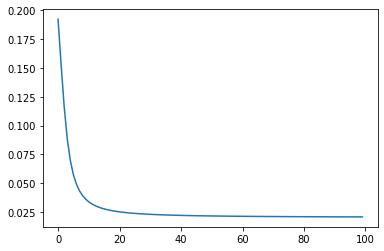

In [10]:
plt.plot(loss_stats[:100])